# A/B Testing Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
import scipy.stats as stats

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape

(294478, 5)

In [4]:
user_unique = df['user_id'].nunique()

print(f'Are the data size {df.shape[0]} has the same value as user count {user_unique}?\n', df.shape[0] == user_unique)

Are the data size 294478 has the same value as user count 290584?
 False


In [5]:
#Wait, are there any missing values?

df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [6]:
#If there are no missing values exist, so what about duplicated data?
duplicated_data = df[df['user_id'].duplicated()]['user_id']

print(duplicated_data.any(), f', there are duplicated user entry in the data: {len(duplicated_data)} entries')

df.drop(duplicated_data.index, axis = 0, inplace = True)

print(f'We drop the duplicate user/repeated user conversion in this data, so the data has dimension of {df.shape}')

True , there are duplicated user entry in the data: 3894 entries
We drop the duplicate user/repeated user conversion in this data, so the data has dimension of (290584, 5)


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.date

In [8]:
#check if group colomn has linked with landing page correctly

check = df[((df['group'] == 'control') & (df['landing_page'] == 'old_page')) | ((df['group'] == 'treatment') & df['landing_page'] == 'new_page')]

check[~(check['group'] == 'control') == (check['landing_page'] == 'old_page')].shape[0]

0

In [9]:
pivoting = pd.DataFrame(df.groupby(['group'])['group'].count())
pivoting

,group
group,
control,145232
treatment,145352


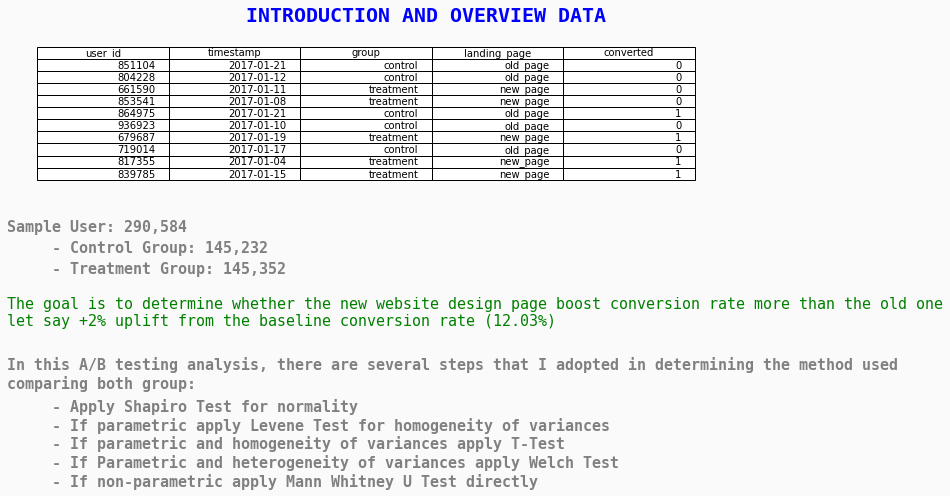

In [57]:
fig, ax = plt.subplots(1, 1, figsize = (13, 7), facecolor = '#fafafa')
    
ax.set_facecolor('#fafafa')

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText = df.values[:10], colLabels = df.columns, loc='upper center')
    
for s in ['top','right','left','bottom']:
    ax.spines[s].set_visible(False)
    
ax.set_yticklabels('')
ax.set_xticklabels('')
ax.tick_params(axis='both',length=0)

ax.text(-0.02, 0.06, 'INTRODUCTION AND OVERVIEW DATA', color = 'blue', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace')
ax.text(-0.06, -0.0001, 'Sample User: 290,584', color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace')
ax.text(-0.06, -0.006, '     - Control Group: 145,232', color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace')
ax.text(-0.06, -0.012, '     - Treatment Group: 145,352', color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace')

ax.text(-0.06, -0.027, 'The goal is to determine whether the new website design page boost conversion rate more than the old one\nlet say +2% uplift from the baseline conversion rate (12.03%)',
        color = 'green', fontsize = 15, fontweight = 'light', fontfamily = 'monospace')
ax.text(-0.06, -0.045, 'In this A/B testing analysis, there are several steps that I adopted in determining the method used\ncomparing both group:',
        color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace')
ax.text(-0.06, -0.073, '     - Apply Shapiro Test for normality\n     - If parametric apply Levene Test for homogeneity of variances\n     - If parametric and homogeneity of variances apply T-Test\n     - If Parametric and heterogeneity of variances apply Welch Test\n     - If non-parametric apply Mann Whitney U Test directly',
        color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace')


#ax.text(-0.06, 0.00005, '      b. Story', color = 'gray', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace')

#plt.savefig('1. Intro.png', dpi=300, bbox_inches='tight')

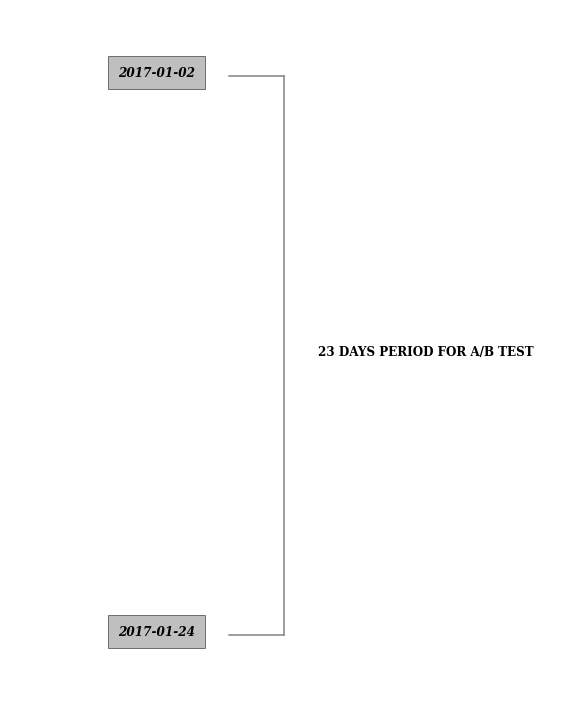

In [39]:
#Define Time Frame

import matplotlib.patches as mpatches

min_date = str(df['timestamp'].min())
max_date = str(df['timestamp'].max())

fig, ax = plt.subplots(figsize = (8, 10))

ax.axvline(x = 0.5, ymin = 0.1, ymax = 0.9, c = 'gray', zorder = 1)
ax.axhline(y = 0.1, xmin = 0.4, xmax = 0.5, c = 'gray', zorder = 1)
ax.axhline(y = 0.9, xmin = 0.4, xmax = 0.5, c = 'gray', zorder = 1)

ax.text(0.2, 0.9, min_date, fontsize = 12, fontweight = 'bold', fontfamily = 'serif', color = 'black', 
       bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}, style = 'italic')
ax.text(0.2, 0.1, max_date, fontsize = 12, fontweight = 'bold', fontfamily = 'serif', color = 'black', 
       bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 10}, style = 'italic')
ax.text(0.56, 0.5, '23 DAYS PERIOD FOR A/B TEST', fontsize = 12, fontweight = 'bold', fontfamily = 'serif', color = 'black')

for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis = u'both', which = u'both', length = 0)

#plt.savefig('2. Timestamp.png', dpi=300, bbox_inches='tight')

plt.show()

<ipython-input-36-6c206d847ab3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conv['timestamp'] = pd.to_datetime(df_conv['timestamp']).dt.day


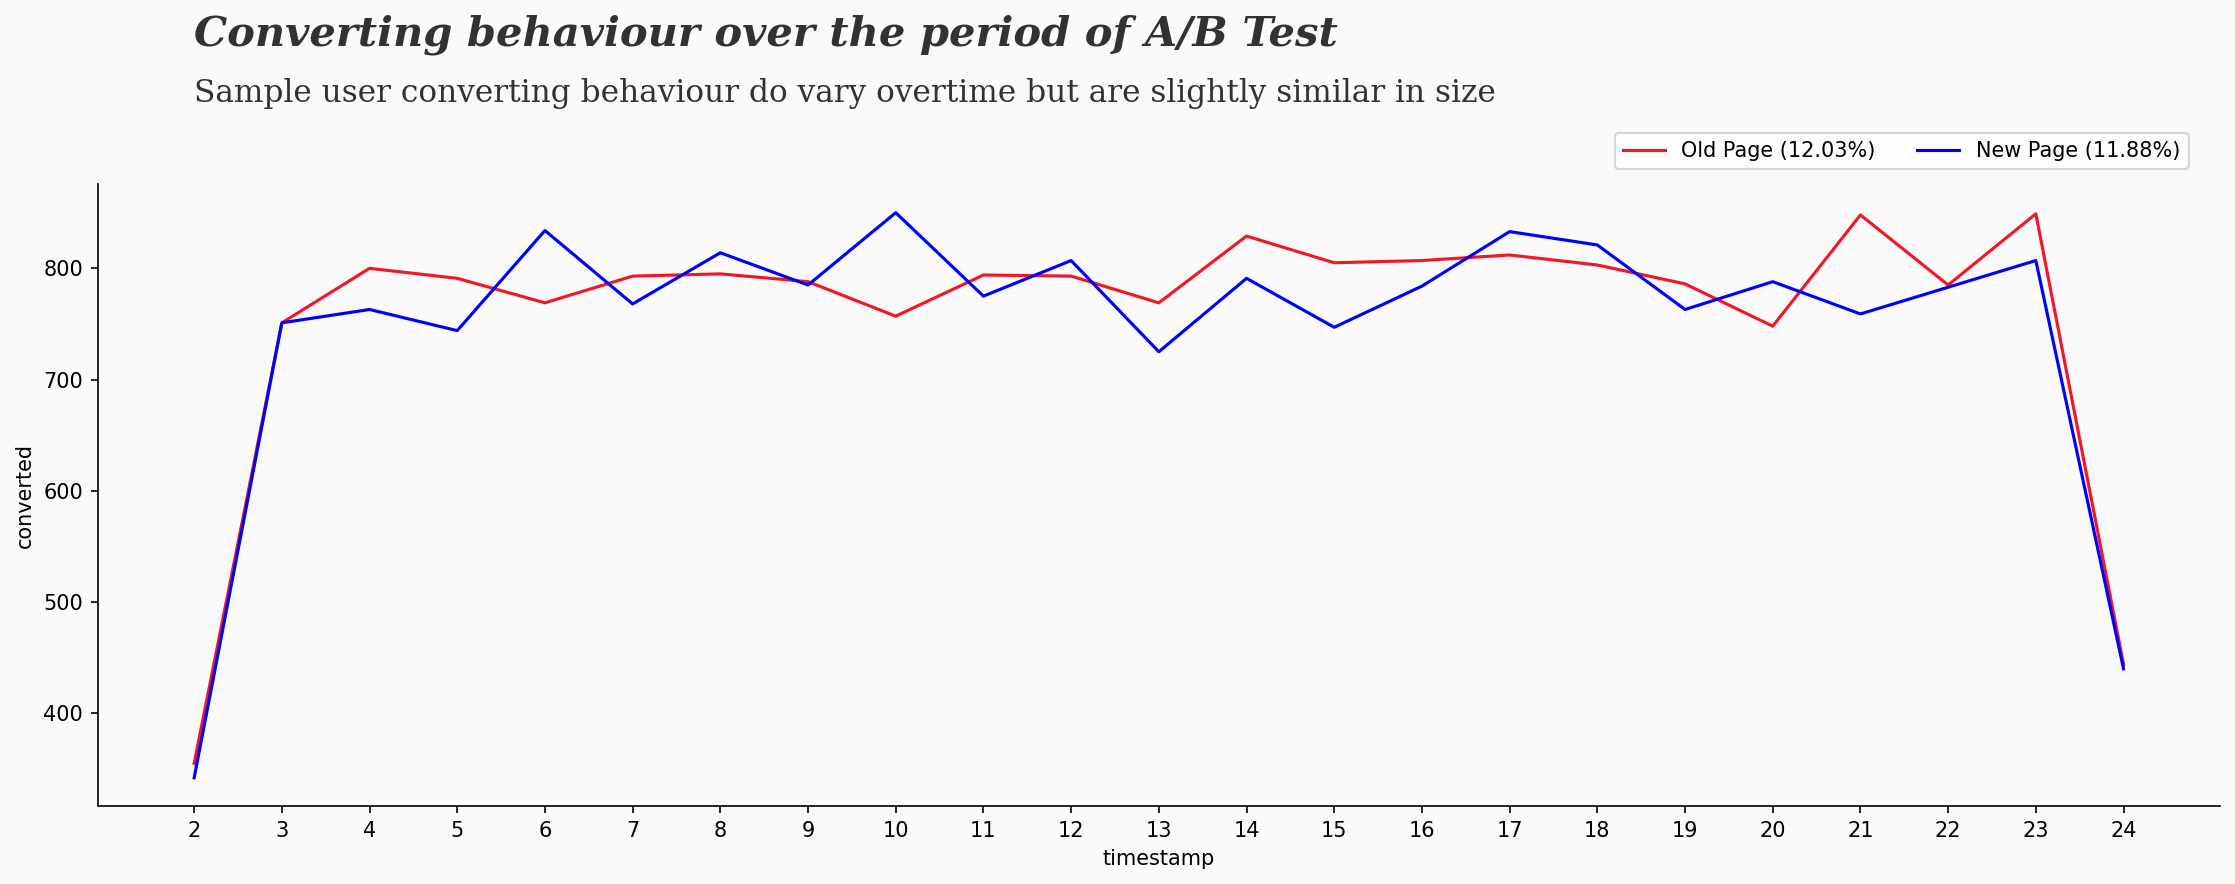

In [36]:
df_conv = df[df['converted'] == 1]
df_conv['timestamp'] = pd.to_datetime(df_conv['timestamp']).dt.day

df_conv_cont = df_conv[df_conv['group'] == 'control'].groupby(['timestamp'])['converted'].sum().reset_index()
df_conv_treat = df_conv[df_conv['group'] == 'treatment'].groupby(['timestamp'])['converted'].sum().reset_index()
cont_conversion = round(df_conv_cont['converted'].sum() / df[df['group'] == 'control'].shape[0] * 100, 2)
treat_conversion = round(df_conv_treat['converted'].sum() / df[df['group'] == 'treatment'].shape[0] * 100, 2)

fig, ax = plt.subplots(1, 1, figsize = (15, 6), dpi = 150, facecolor = "#fafafa")
sns.lineplot(data = df_conv_cont, x = 'timestamp',
             y = 'converted', ax = ax, color = '#F31726', label = 'Old Page')
sns.lineplot(data = df_conv_treat, x = 'timestamp',
             y = 'converted', ax = ax, color = 'blue', label = 'New Page')

ax.set_facecolor('#fafafa')

ax.set_xticks(df_conv_cont['timestamp'])

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, [f'Old Page ({cont_conversion}%)', f'New Page ({treat_conversion}%)'], ncol = 2, 
          bbox_to_anchor = (0.85, 1.1), loc = 'upper center')

ax.text(2, 1000, 'Converting behaviour over the period of A/B Test', fontsize = 20, fontfamily = 'serif', fontweight = 'bold', 
        color = '#323232', style = 'italic')
ax.text(2, 950, 'Sample user converting behaviour do vary overtime but are slightly similar in size', fontsize = 15, fontfamily = 'serif', fontweight = 'light', 
        color = '#323232')

#plt.savefig('3. Converting Behaviour.png', dpi=300, bbox_inches='tight')

In [66]:
#      reference code
#      https://www.kaggle.com/ekrembayar/a-b-testing-step-by-step-hypothesis-testing

def AB_Test(dataframe, group, target):
    
    # Split A/B
    control_group = dataframe[dataframe[group] == "control"][target]
    treatment_group = dataframe[dataframe[group] == "treatment"][target]
    
    # Assumption: Normality
    control_dist = shapiro(control_group)[1] < 0.05
    treatment_dist = shapiro(treatment_group)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (control_dist == False) & (treatment_dist == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(control_group, treatment_group)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(control_group, treatment_group, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(control_group, treatment_group, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(control_group, treatment_group)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
    
    #Result
    fig, ax = plt.subplots(1, 1, figsize = (13, 8), facecolor = '#fafafa')
    
    ax.set_facecolor('#fafafa')
    
    for s in ['top','right','left','bottom']:
        ax.spines[s].set_visible(False)
    
    ax.set_yticklabels('')
    ax.set_xticklabels('')
    ax.tick_params(axis='both',length=0)
    
    ax.text(0, 1, 'Hypothesis Statement:', color = 'blue', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace')
    ax.text(0.05, 0.88, 
        'Null hypothesis = There is no difference between control group and treatment group \nAlternative hypothesis = There is difference between control group and treatment group', 
            color = 'gray', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace')

    ax.axhline(0.86, xmin = 0, xmax = 1, c = 'gray', zorder = 1)
    
    ax.text(0, 0.78, 'A/B Test Result:', color = 'blue', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace')
    ax.text(0.05, 0.72, 'Non-Parametric method used is Mann Whitney U Test.', color = 'gray', fontsize = 20, fontweight = 'bold',
            fontfamily = 'monospace')
    ax.text(0.05, 0.66, 'Rule of Thumb: if p-value < 0.05 then reject the null hypothesis', color = 'gray', fontsize = 20, fontweight = 'bold',
            fontfamily = 'monospace')
    ax.text(0.05, 0.60, f'P value gained: {round(ttest, 3)}', color = 'gray', fontsize = 20, fontweight = 'bold', 
            fontfamily = 'monospace')
    ax.text(0.05, 0.54, 'Failed', color = 'red', fontsize = 20, fontweight = 'bold', 
            fontfamily = 'monospace')
    ax.text(0.2, 0.54, 'to reject the null hypothesis!', color = 'gray', fontsize = 20, fontweight = 'bold', 
            fontfamily = 'monospace', )
    
    ax.axhline(0.50, xmin = 0, xmax = 1, c = 'gray', zorder = 1)
    
    ax.text(0, 0.46, 'Interpretation:', color = 'blue', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace')
    ax.text(0., 0.2, '''
    A/B test result stated that we failed to reject the null hypothesis which indicate 
    there is no difference between the old page and the new page. In other word, 
    in order to increase conversion rate, new page didn't seem to encouraged user 
    to do more transaction with the company. There are maybe several factors why this 
    new page didn't have significant impact on conversion rate. 
    ''', color = 'gray', fontsize = 18, fontweight = 'light', fontfamily = 'monospace')
    
    #plt.savefig('4.result.png', dpi=300, bbox_inches='tight')

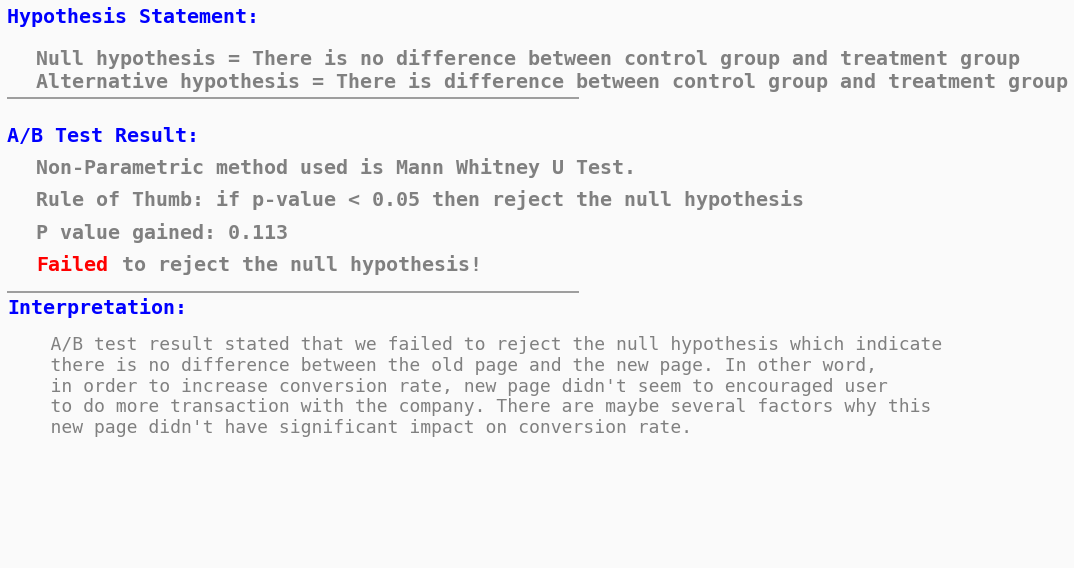

In [67]:
#call the a/b test function

AB_Test(dataframe=df, group = "group", target = "converted")